In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# Figure 4.1

In [2]:
independent_runs = ['independent_magnetization_p=0.3_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75.pkl']

In [3]:
for magnetization in independent_runs:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)

In [4]:
column_average = [sum(y) / len(y) for y in zip(*x)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


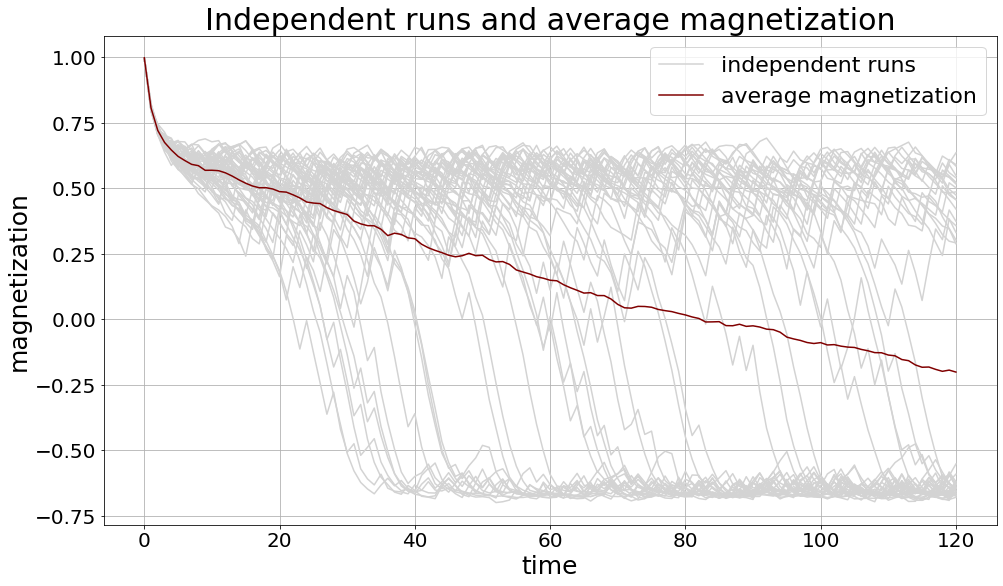

In [5]:
plt.figure(figsize=(16, 9))
for i in range(len(x)):
    if i == 0:
        plt.plot(x[i], color='lightgrey', label='independent runs')
    else:
        plt.plot(x[i], color='lightgrey')
plt.plot(column_average, color='maroon', label='average magnetization')
plt.legend(prop={'size': 22})
plt.title('Independent runs and average magnetization', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_1.eps', format='eps')

# Figure 4.2

In [6]:
values_plots = ['magnetization_p=0.25_q=4_a=0.4_b=0.4_c=0.1_d=0.1_h=0.5.pkl',
 'magnetization_p=0.3_q=4_a=0.25_b=0.7_c=0.025_d=0.025_h=0.75.pkl',
 'magnetization_p=0.5_q=4_a=0.15_b=0.5_c=0.3_d=0.05_h=0.75.pkl',
 'magnetization_p=0.15_q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.75.pkl',
 'magnetization_p=0.08_q=4_a=0.2_b=0.7_c=0.05_d=0.05_h=0.75.pkl',
 'magnetization_p=0.3_q=4_a=0.4_b=0.2_c=0.2_d=0.2_h=0.75.pkl',
 'magnetization_p=0.5_q=4_a=0.1_b=0.8_c=0.05_d=0.05_h=0.25.pkl',
 'magnetization_p=0.25_q=4_a=0.3_b=0.4_c=0.2_d=0.1_h=0.25.pkl',
 'magnetization_p=0.3_q=4_a=0.7_b=0.15_c=0.05_d=0.1_h=0.75.pkl',
 'magnetization_p=0.07_q=4_a=0.4_b=0.4_c=0.1_d=0.1_h=0.25.pkl',
 'magnetization_p=0.01_q=4_a=0.3_b=0.6_c=0.05_d=0.05_h=0.75.pkl',
 'magnetization_p=0.5_q=4_a=0.4_b=0.2_c=0.2_d=0.2_h=0.5.pkl']

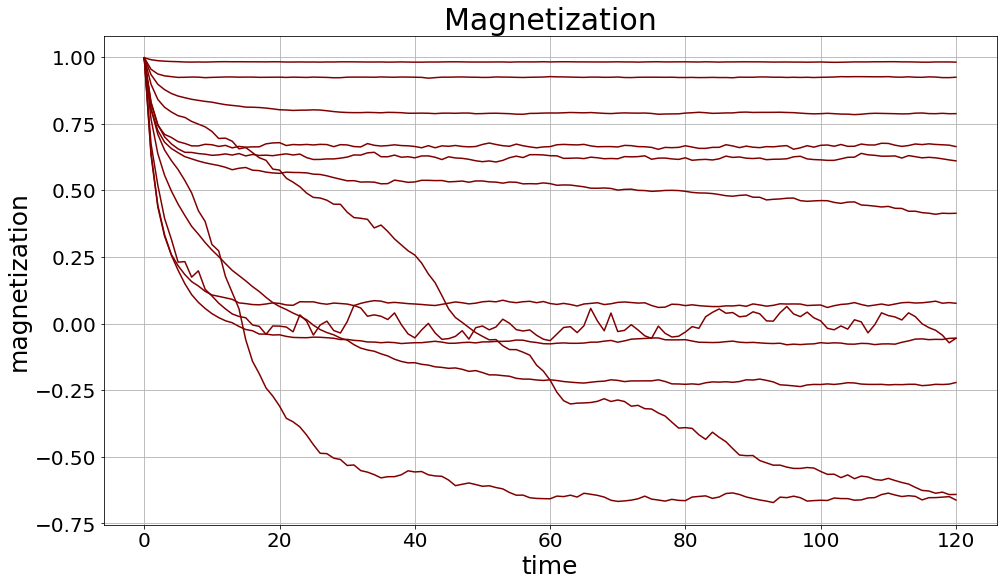

In [7]:
plt.figure(figsize=(16, 9))
for magnetization in values_plots:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
    plt.plot(x, color='maroon')
plt.title('Magnetization', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_2.eps', format='eps')

# Figure 4.3

In [8]:
def plot_magnetizations(magnetizations, condition=None, legend=True):
    plt.figure(figsize=(16, 9))
    for i, magnetization in enumerate(magnetizations):
        if i%5 == 4 or i == len(magnetizations)-1:
            with open(magnetization, 'rb') as f:
                x = pickle.load(f)
            magnetization = magnetization.replace(condition, '')
            magnetization = magnetization.replace('magnetization_', '').replace('_', ' ').replace('.pkl', '')
            plt.plot(x, label=magnetization)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('time', fontsize=25)
    plt.ylabel('magnetization', fontsize=25)
    plt.grid()
    if legend: plt.legend(prop={'size': 20})
    if condition: plt.title(condition.replace('_', ' '), fontsize=28)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


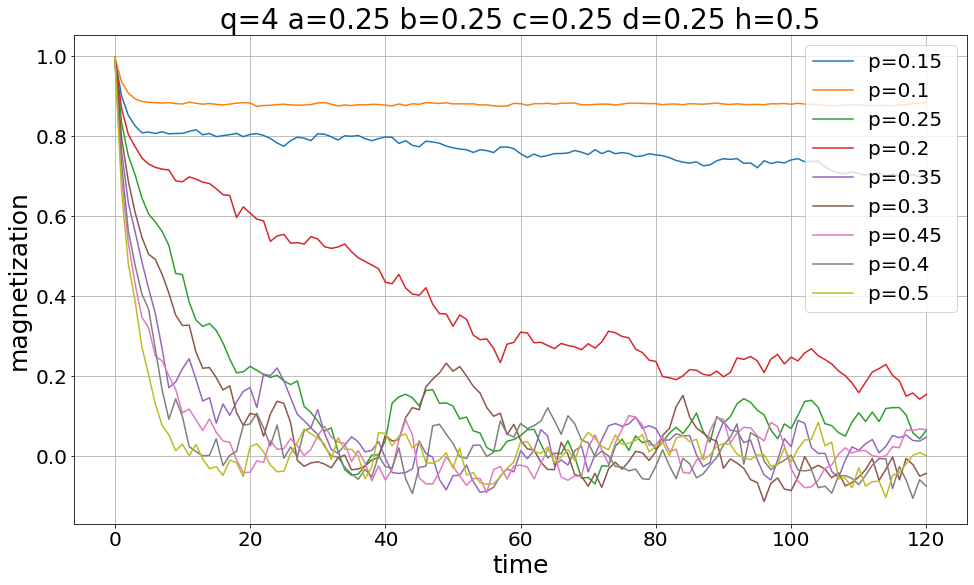

In [9]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5'
values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]

plot_magnetizations(values, condition, True)
plt.savefig(r'plots\figure4_3.eps', format='eps')

# Figure 4.4

In [10]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5'
values = [magn for magn in magnetizations if (condition in magn)]

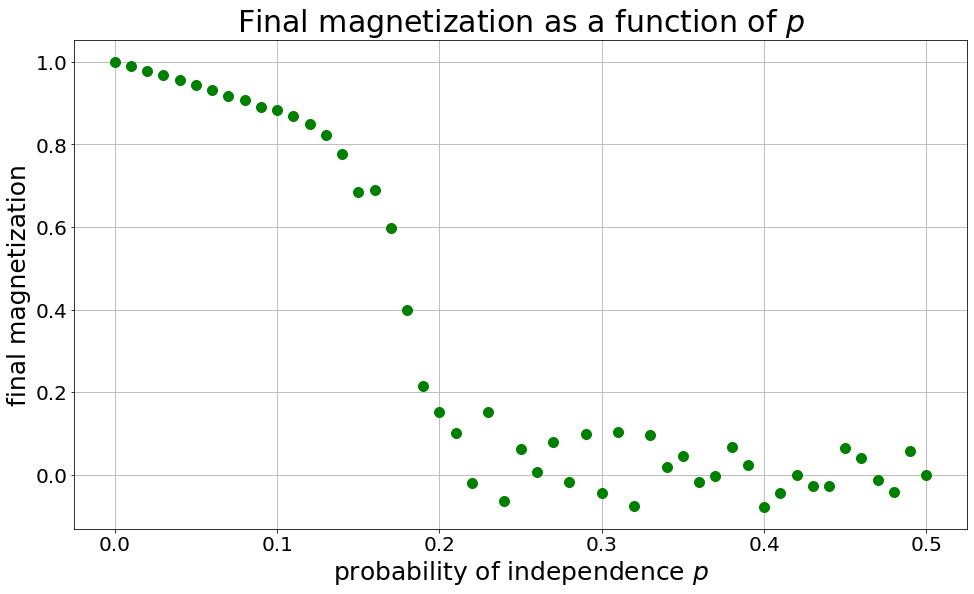

In [11]:
plt.figure(figsize=(16, 9))
for magnetization in values:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
        p = float(magnetization.split('p=')[1].split('_q')[0])
        plt.plot(p, x[-1], '.', color='green', markersize=20)
plt.title('Final magnetization as a function of $p$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('probability of independence $p$', fontsize=25)
plt.ylabel('final magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_4.eps', format='eps')    

# Figure 4.5

In [12]:
def plot_magnetizations(magnetizations, condition=None, legend=True):
    plt.figure(figsize=(16, 9))
    for i, magnetization in enumerate(magnetizations):
        if i%5 == 4 or i == len(magnetizations)-1:
            with open(magnetization, 'rb') as f:
                x = pickle.load(f)
            magnetization = magnetization.replace(condition, '')
            magnetization = magnetization.replace('magnetization_', '').replace('_', ' ').replace('.pkl', '')
            plt.plot(x, label=magnetization)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('time', fontsize=25)
    plt.ylabel('magnetization', fontsize=25)
    plt.grid()
    if legend: plt.legend(prop={'size': 20})
    if condition: plt.title(condition.replace('_', ' '), fontsize=28)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


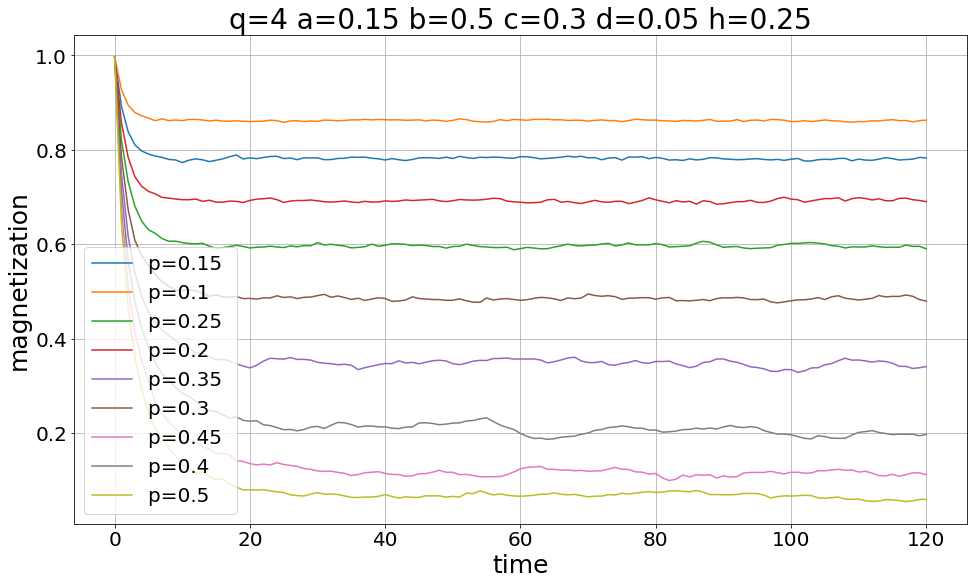

In [13]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.15_b=0.5_c=0.3_d=0.05_h=0.25'
values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]

plot_magnetizations(values, condition, True)
plt.savefig(r'plots\figure4_5.eps', format='eps')

# Figure 4.6 - final magnetization as function of $p$

In [14]:
values = [magn for magn in magnetizations if (condition in magn)]

In [15]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.15_b=0.5_c=0.3_d=0.05_h=0.25'
values = [magn for magn in magnetizations if (condition in magn)]

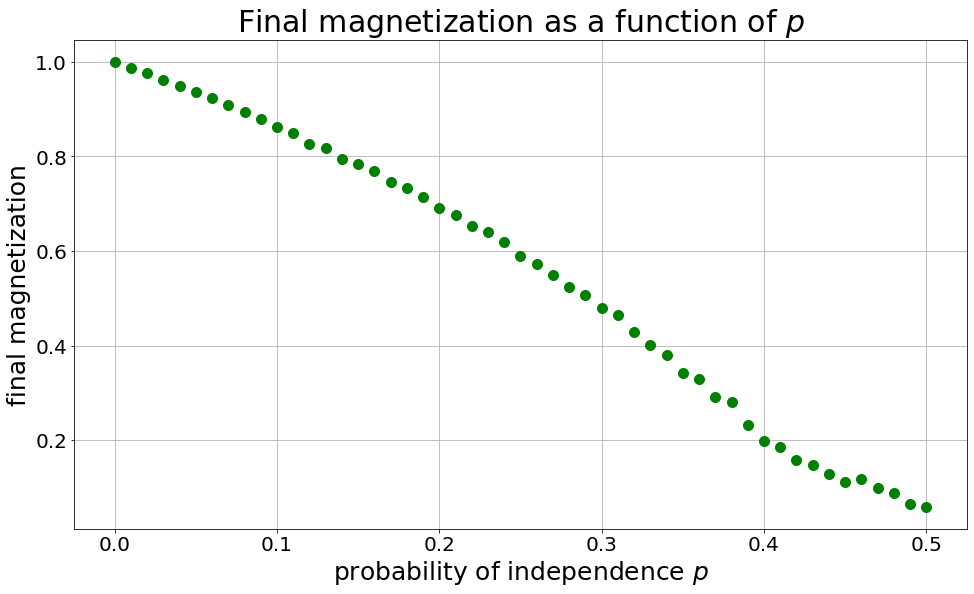

In [16]:
plt.figure(figsize=(16, 9))
for magnetization in values:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
        p = float(magnetization.split('p=')[1].split('_q')[0])
        plt.plot(p, x[-1], '.', color='green', markersize=20)
plt.title('Final magnetization as a function of $p$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('probability of independence $p$', fontsize=25)
plt.ylabel('final magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_6.eps', format='eps')

# Figure 4.7 - final magnetization as function of a, b

In [17]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition_1 = 'p=0.25_q=4_a='
condition_2 = '_c=0.3_d=0.05_h=0.25'
values = [magn for magn in magnetizations if (condition_1 in magn and condition_2 in magn)]

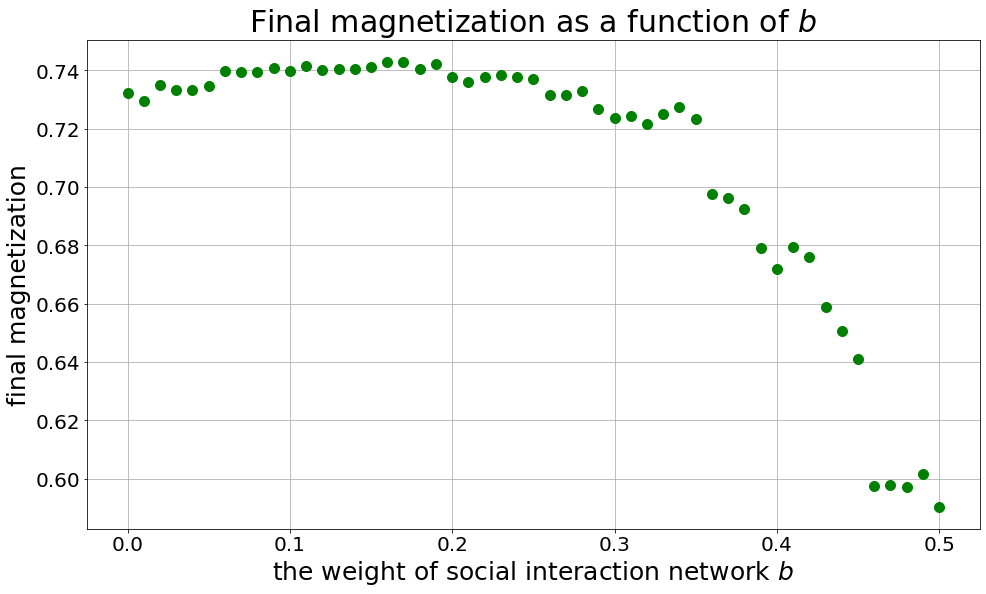

In [18]:
plt.figure(figsize=(16, 9))
for magnetization in values:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
        b = float(magnetization.split('b=')[1].split('_c=')[0])
        plt.plot(b, x[-1], '.', color='green', markersize=20)
plt.title('Final magnetization as a function of $b$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('the weight of social interaction network $b$ ', fontsize=25)
plt.ylabel('final magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_7.eps', format='eps')  

# Figure 4.8

In [19]:
def plot_magnetizations(magnetizations, condition=None, legend=True):
    plt.figure(figsize=(16, 9))
    for magnetization in magnetizations:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
        magnetization = magnetization.replace(condition, '')
        magnetization = magnetization.replace('magnetization_', '').replace('_', ' ').replace('.pkl', '')
        plt.plot(x, label=magnetization)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('time', fontsize=25)
    plt.ylabel('magnetization', fontsize=25)
    plt.grid()
    if legend: plt.legend(prop={'size': 20})
    if condition: plt.title(condition.replace('_', ' '), fontsize=28)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


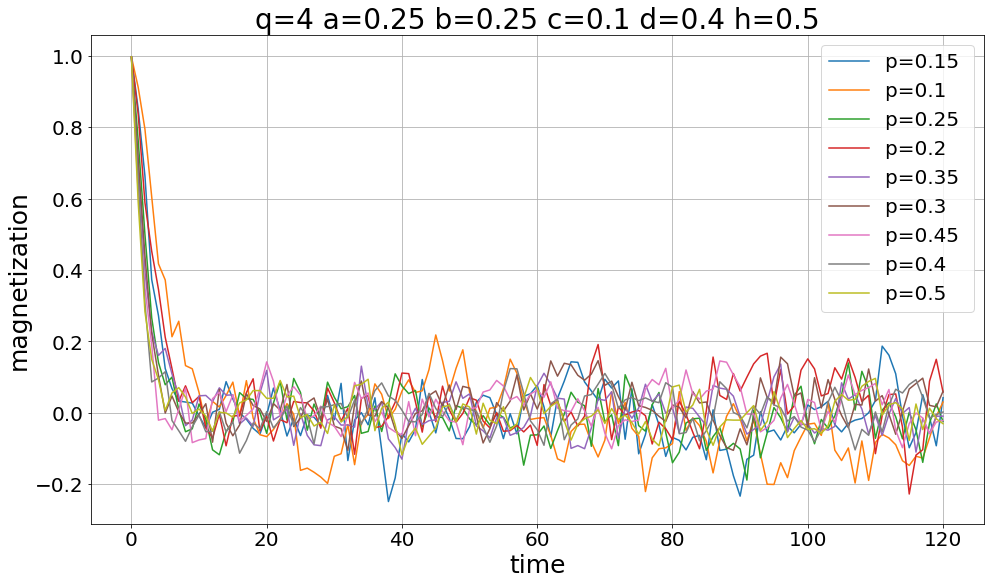

In [20]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.25_b=0.25_c=0.1_d=0.4_h=0.5'
values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]

plot_magnetizations(values, condition, True)
plt.savefig(r'plots\figure4_8.eps', format='eps')

# Figure 4.9

In [21]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.25_b=0.25_c=0.1_d=0.4_h=0.5'
values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


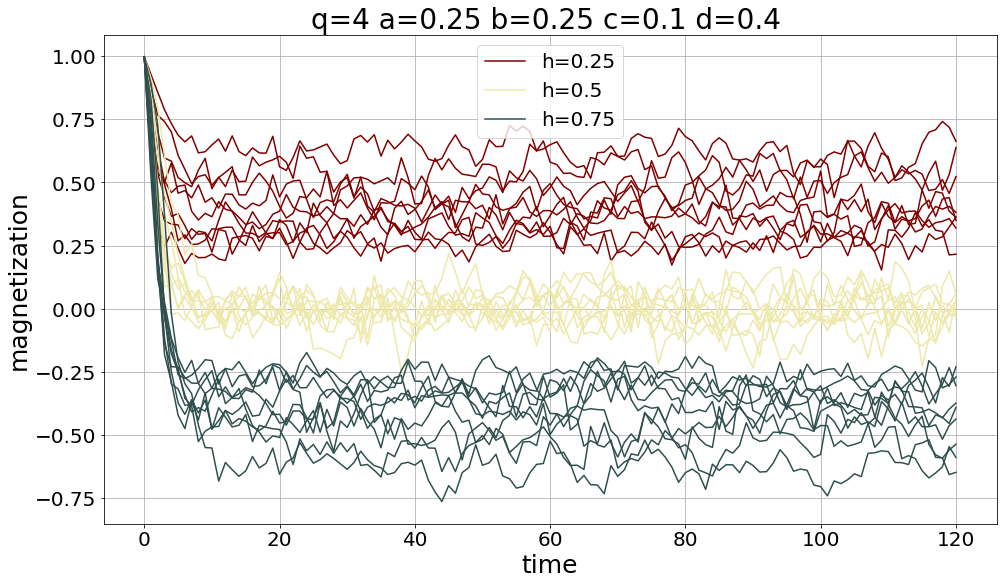

In [22]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

plt.figure(figsize=(16, 9))
hs = [0.25, 0.5, 0.75]
colors = ['maroon', 'palegoldenrod', 'darkslategrey']
for i, h in enumerate(hs):
    condition = f'q=4_a=0.25_b=0.25_c=0.1_d=0.4_h={h}'
    values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]

    for magnetization in values:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
        if magnetization == values[0]:
            plt.plot(x, color=colors[i], label=f'h={h}')
        else:
            plt.plot(x, color=colors[i])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.legend(prop={'size': 20})
plt.title(condition.replace('_', ' ').replace('h=0.75', ''), fontsize=28)

plt.savefig(r'plots\figure4_9.eps', format='eps')

# Figure 4.10

In [23]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition_1 = '_p=0.25_q=4_a=0.25_b=0.25_c=0.1_d=0.4_h=0.5'
condition_2 = '4'
values = [magn for magn in magnetizations if (condition_1 in magn and condition_2 in magn)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


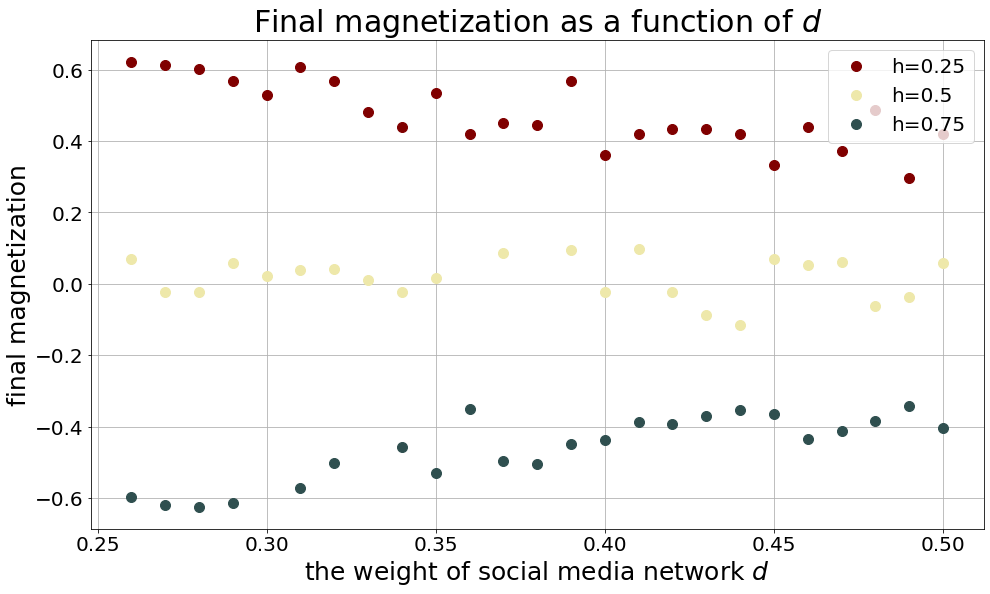

In [24]:
plt.figure(figsize=(16, 9))

hs = [0.25, 0.5, 0.75]
colors = ['maroon', 'palegoldenrod', 'darkslategrey']
for i, h in enumerate(hs):
    condition_1 = f'_p=0.25_q=4_'
    condition_2= f'_h={h}'
    values = [magn for magn in magnetizations if (condition_1 in magn and condition_2 in magn)]
    #print(values)
    for magnetization in values:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
            d = float(magnetization.split('d=')[1].split('_h=')[0])
            if d > 0.25:
                if magnetization == values[15]:
                    plt.plot(d, x[-1], '.', color=colors[i], markersize=20, label=f'h={h}')
                else:
                    plt.plot(d, x[-1], '.', color=colors[i], markersize=20)
            
    plt.title('Final magnetization as a function of $d$', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('the weight of social media network $d$ ', fontsize=25)
    plt.ylabel('final magnetization', fontsize=25)
    plt.grid()
    plt.legend(prop={'size': 20})
plt.savefig(r'plots\figure4_10.eps', format='eps')  

# Figure 4.11

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


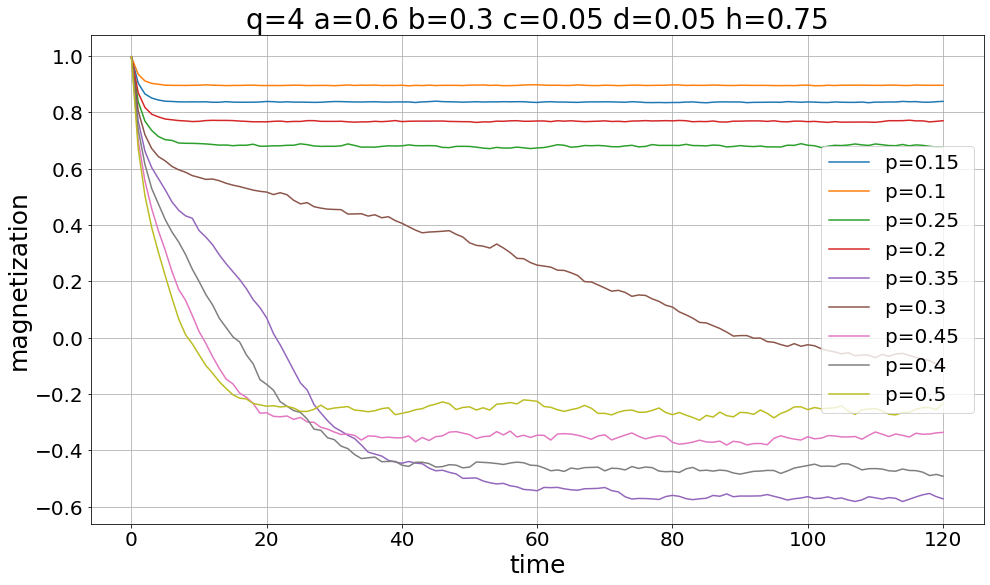

In [25]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75'
values = [magn for magn in magnetizations if (condition in magn and 'ind' not in magn and 't=360' not in magn and 'p=0.0' not in magn)]

plot_magnetizations(values, condition, True)
plt.savefig(r'plots\figure4_11.eps', format='eps')

# Figure 4.12

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


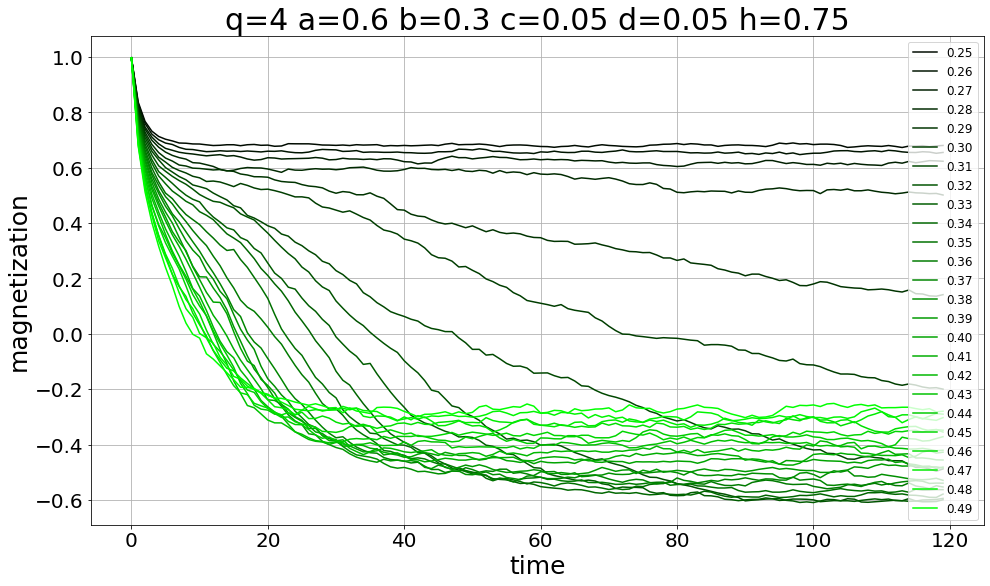

In [26]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

plt.figure(figsize=(16, 9))
for p in range(25, 50, 1):
    value_p = round(p*0.01, 2)
    condition = f'p={value_p}_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75'
    values = [magn for magn in magnetizations if (condition in magn and 't=360' in magn and f'p={value_p}' in magn)]
    y = np.zeros(120)
    for magnetization in values:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
            y += x[0:120]
    #plt.plot(y[0:120]/6, color=(0.01*p, 1-0.02*p, 1-0.01*p), label="{:.2f}".format(value_p))
    plt.plot(y[0:120]/6, color=(0, 0.02*(p-24)*2, 0), label="{:.2f}".format(value_p))
plt.legend(prop={'size': 12})
plt.title('q=4 a=0.6 b=0.3 c=0.05 d=0.05 h=0.75', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_12.eps', format='eps')

# Figure 4.13

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


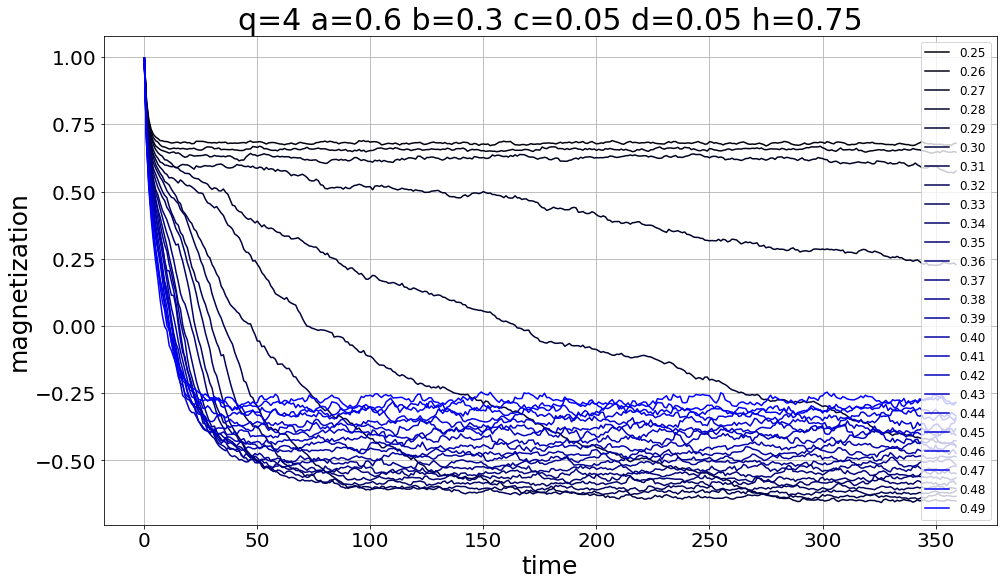

In [27]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

plt.figure(figsize=(16, 9))
for p in range(25, 50, 1):
    value_p = round(p*0.01, 2)
    condition = f'p={value_p}_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75'
    values = [magn for magn in magnetizations if (condition in magn and 't=360' in magn and f'p={value_p}' in magn)]
    y = np.zeros(360)
    for magnetization in values:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
            y += x[0:360]
    #plt.plot(y[0:120]/6, color=(0.01*p, 1-0.02*p, 1-0.01*p), label="{:.2f}".format(value_p))
    plt.plot(y/6, color=(0, 0, 0.02*(p-24)*2), label="{:.2f}".format(value_p))
plt.legend(prop={'size': 12})
plt.title('q=4 a=0.6 b=0.3 c=0.05 d=0.05 h=0.75', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure4_13.eps', format='eps')

# Figure 4.14

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


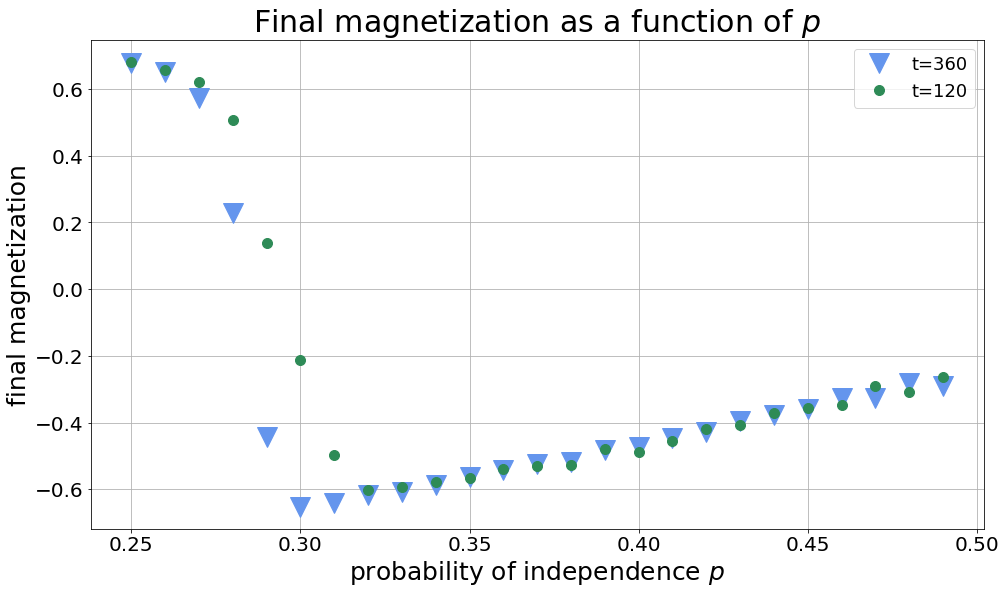

In [28]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

plt.figure(figsize=(16, 9))
for p in range(25, 50, 1):
    value_p = round(p*0.01, 2)
    condition = f'p={value_p}_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75'
    values = [magn for magn in magnetizations if (condition in magn and 't=360' in magn and f'p={value_p}' in magn)]
    y = np.zeros(1)
    z = np.zeros(1)
    for magnetization in values:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
            y += x[120]
            z += x[360]
    if p == 25:
        plt.plot(value_p, z/6, 'v', markersize=20, color='cornflowerblue', label='t=360')
        plt.plot(value_p, y/6, '.', markersize=20, color='seagreen', label='t=120')
    else:
        plt.plot(value_p, z/6, 'v', markersize=20, color='cornflowerblue')
        plt.plot(value_p, y/6, '.', markersize=20, color='seagreen')
plt.title('Final magnetization as a function of $p$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('probability of independence $p$', fontsize=25)
plt.ylabel('final magnetization', fontsize=25)
plt.grid()
plt.legend(prop={'size':18})
plt.savefig(r'plots\figure4_14.eps', format='eps')

# Figure 4.15

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


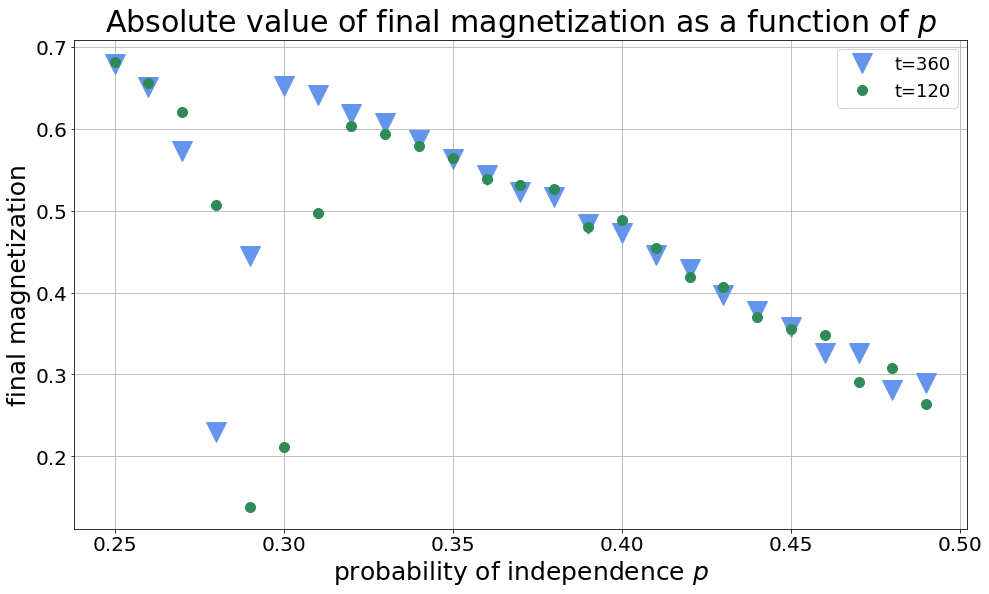

In [29]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

plt.figure(figsize=(16, 9))
for p in range(25, 50, 1):
    value_p = round(p*0.01, 2)
    condition = f'p={value_p}_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75'
    values = [magn for magn in magnetizations if (condition in magn and 't=360' in magn and f'p={value_p}' in magn)]
    y = np.zeros(1)
    z = np.zeros(1)
    for magnetization in values:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
            y += x[120]
            z += x[360]
    if p == 25:
        plt.plot(value_p, abs(z/6), 'v', markersize=20, color='cornflowerblue', label='t=360')
        plt.plot(value_p, abs(y/6), '.', markersize=20, color='seagreen', label='t=120')
    else:
        plt.plot(value_p, abs(z/6), 'v', markersize=20, color='cornflowerblue')
        plt.plot(value_p, abs(y/6), '.', markersize=20, color='seagreen')
plt.title('Absolute value of final magnetization as a function of $p$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('probability of independence $p$', fontsize=25)
plt.ylabel('final magnetization', fontsize=25)
plt.grid()
plt.legend(prop={'size':18})
plt.savefig(r'plots\figure4_15.eps', format='eps')

# Figure 5.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


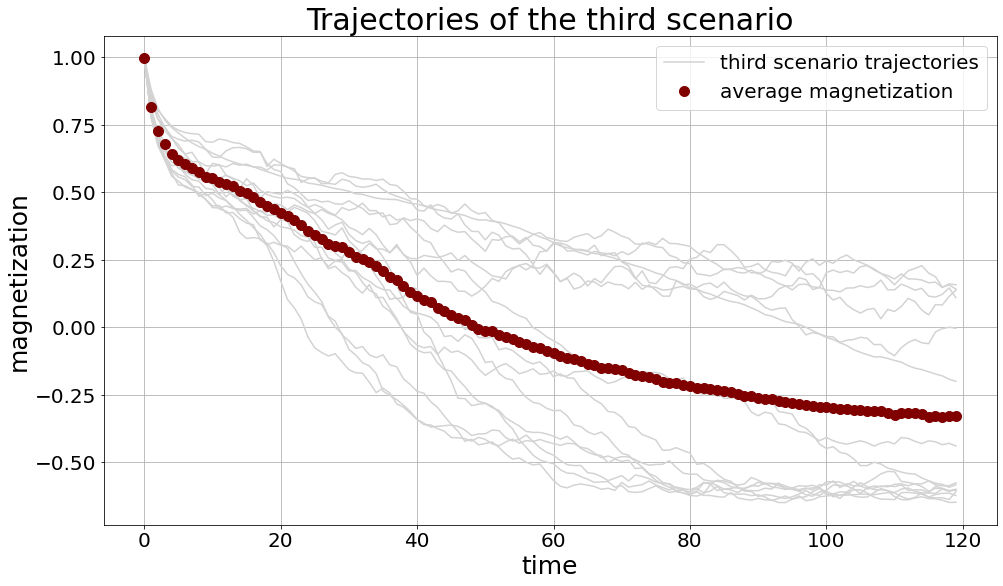

In [30]:
plt.figure(figsize=(16, 9))
values = [
         'magnetization_p=0.32_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=5.pkl',
         'magnetization_p=0.32_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=9.pkl',
         'magnetization_p=0.33_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=11.pkl',
         'magnetization_p=0.33_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=16.pkl',
         'magnetization_p=0.34_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=2.pkl',
         'magnetization_p=0.34_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=24.pkl',
         'magnetization_p=0.31_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=30.pkl',
         'magnetization_p=0.31_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=36.pkl',
         'magnetization_p=0.29_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=74.pkl',
         'magnetization_p=0.3_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75_t=360_r=3.pkl',
         'magnetization_p=0.22_q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5.pkl',
         'magnetization_p=0.2_q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5.pkl',
         'magnetization_p=0.21_q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5.pkl',
         'magnetization_p=0.23_q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5.pkl',
         'magnetization_p=0.15_q=4_a=0.1_b=0.8_c=0.05_d=0.05_h=0.75.pkl',
]
ys = []
for magnetization in values:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
        ys.append(x)
        if magnetization == values[0]:
            plt.plot(x[0:120], color='lightgrey', label='third scenario trajectories')
        else:
            plt.plot(x[0:120], color='lightgrey')
            
column_average = [sum(y) / len(y) for y in zip(*ys)]
plt.plot(column_average[0:120], '.', markersize=20, color='maroon', label='average magnetization')
plt.legend(prop={'size': 20})
plt.title('Trajectories of the third scenario', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure5_1.eps', format='eps')